**Exercise 1**

Supervised learning, unsupervised learning and reinforcement learning 
Classify the following learning problems as supervised learning, unsupervised learning and reinforcement learning tasks.

# **Unsupervised learning**

1.	Identification of products frequently bought together
2.	Automatic sorting of images wrt the depicted objects

# **Reinforcement learning**
3.	Chess computer capable of learning from previous games
4.	Obstacle avoidance in robotics

# **Supervised learning**

5.	Spam recognition and filtering
6.	Classification of applicants as credit-worthy or unworthy
7.	Object recognition in computer vision


**Exercise 3**

**Task**: Implement a gradient descent algorithm and approximate a given dataset 
1. Load the data in GD_Example.txt (it includes 500 pairs of data (xi,yi)) b) Plot the data points  
2. Implement the cost function 
3. Using gradient descent algorithm with 500 iterations, find the best fitting line characterized by: mx + b. (determine m and b) 
4. Plot the final fitting line alongside with the scattered data points. 


m 0.516, b 0.15200000000000002, cost 62.400000000000006 epoch 0
m 0.9093600000000001, b 0.27, cost 36.886512 epoch 1
m 1.2091008, b 0.3620384, cost 22.015378905600002 epoch 2
m 1.43737632, b 0.43425158399999997, cost 13.346104547665917 epoch 3
m 1.6110984345600001, b 0.49132397312, cost 8.290987450255221 epoch 4
m 1.7431773405696, b 0.536831587584, cost 5.342043159833519 epoch 5
m 1.8434684303892481, b 0.573504315398144, cost 3.6204928512587347 epoch 6
m 1.919495116779725, b 0.6034261232668262, cost 2.6142275906739423 epoch 7
m 1.9770006236921758, b 0.6281878937947062, cost 2.024815505192534 epoch 8
m 2.0203692128522146, b 0.6490040984972815, cost 1.678345135554248 epoch 9
m 2.0529477401148903, b 0.666801863756203, cost 1.4734693558980494 epoch 10
m 2.0772911254642423, b 0.6822889620741855, cost 1.3511279423734712 epoch 11
m 2.095349740137658, b 0.6960057153048473, cost 1.276903385056717 epoch 12
m 2.1086124543890823, b 0.7083646165904909, cost 1.23073872863466 epoch 13
m 2.11821583742

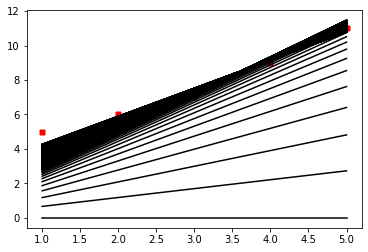

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

def gradient_descent(x,y):
#d) Using gradient descent algorithm with 500 iterations, find the best fitting line characterizedby: 𝑚𝑥 + 𝑏. (determine m and b)
#Given
    m_c= b_c = 0
    epoch = 500
    n = len(x)
    learning_rate = 0.01
    cost_prev = 0
#b) Plot the data points
    plt.scatter(x,y,color='red',marker='+',linewidth=5)  
    for i in range(epoch):
        y_predict = m_c * x + b_c
#c) Implement the cost function
        cost = (1/n) * sum([val**2 for val in (y-y_predict)])
       
        d_m = -(2/n)*sum(x*(y-y_predict))
        d_b = -(2/n)*sum(y-y_predict)
        m_c = m_c - learning_rate * d_m
        b_c = b_c - learning_rate * d_b
#e) Plot the final fitting line alongside with the scattered data points.
        plt.plot(x,y_predict,color='black')
        if math.isclose(cost, cost_prev, rel_tol=1e-20):
            break
        cost_prev = cost
        print ("m {}, b {}, cost {} epoch {}".format(m_c,b_c,cost, i))
    return m_c,b_c
       
if __name__ == "__main__":
    df = pd.read_csv("/content/drive/MyDrive/GD_Example.txt")
    x = np.array(df.X)
    y = np.array(df.Y)
    m, b = gradient_descent(x,y)
    print('============================================================')
    print("Gradient descent function: Coef {} Intercept {}".format(m, b))



**Exercise 2**

1. Download and upload the data set breast-cancer-wisconsin.data.txt enclosed with this exercise
2. Drop the missing or non-numeric values
3. Drop the ID column
4. Create features and labels arrays X and y
5. Scale/Standardize the features array X (use Minmax or Standard scaling)
6. Transform the feature array y to a binary array 0 or 1
7. Split the arrays into training and test arrays (4 resulting arrays)

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
print('1.	Download and upload the data set breast-cancer-wisconsin.data.txt enclosed with this exercise')
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
print ('Before drop Id column:')
print(data.head())
print('============================================================')
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('============================================================')




1.	Download and upload the data set breast-cancer-wisconsin.data.txt enclosed with this exercise
Before drop Id column:
        Id  Clump Thickness  Uniformity of Cell Size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  1016277                6                        8   
4  1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0 

In [4]:
print('2.	Drop the missing or non-numeric values') 
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))




2.	Drop the missing or non-numeric values
Number of instances = 699
Number of attributes = 11
	Id: 0
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0
Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object
Number of rows in original data = 699
Number of rows after discarding missing values = 683


In [5]:
print('3.	Drop the ID column') 
data = data.drop(['Id'],axis=1)
print ('After drop Id column:')
print('------------------------------------------------------------')
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('------------------------------------------------------------')
#print(data.head())



3.	Drop the ID column
After drop Id column:
------------------------------------------------------------
Number of instances = 699
Number of attributes = 10
------------------------------------------------------------


In [7]:
print('4.	Create features and labels arrays X and y') 
X = np.array(data.drop(['Class'], 1))
Y = np.array(data['Class'])

#X = array[:,0:10]
#Y = array[:,9]

print(X)
print(Y)



4.	Create features and labels arrays X and y
[[5 1 1 ... 3 1 1]
 [5 4 4 ... 3 2 1]
 [3 1 1 ... 3 1 1]
 ...
 [5 10 10 ... 8 10 2]
 [4 8 6 ... 10 6 1]
 [4 8 8 ... 10 4 1]]
[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4
 2 4 4 2 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4
 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2
 4 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4
 2 4 4 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4
 4 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 4 4 2 2 2
 2 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4
 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 2 4 2 2 4 2 4 4 4 2 2
 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [8]:
print('5.	Scale/Standardize the features array X (use Minmax or Standard scaling)') 

min_max = preprocessing.MinMaxScaler().fit_transform(X).ravel()
standard = preprocessing.StandardScaler().fit_transform(X).ravel()
robust = preprocessing.RobustScaler().fit_transform(X).ravel()

x_scaled_df = pd.DataFrame({'X': X.ravel(), 'min_max': min_max, 'standard': standard, 'robust': robust})
print(x_scaled_df.round(2))


5.	Scale/Standardize the features array X (use Minmax or Standard scaling)
       X  min_max  standard  robust
0      5     0.44      0.21    0.25
1      1     0.00     -0.70    0.00
2      1     0.00     -0.74    0.00
3      1     0.00     -0.63    0.00
4      2     0.11     -0.55    0.00
...   ..      ...       ...     ...
6286   4     0.33      0.35    1.00
6287   5     0.44      0.40    0.80
6288  10     1.00      2.69    2.33
6289   4     0.33      0.37    1.00
6290   1     0.00     -0.34    0.00

[6291 rows x 4 columns]


In [ ]:
print('6.	Transform the feature array y to a binary array 0 or 1')
# import library
from sklearn.preprocessing import MinMaxScaler

# define the scaler
scaler = MinMaxScaler()

# transform the data
X_scaled = pd.DataFrame(scaler.fit_transform(array))
print(X_scaled)



6.	Transform the feature array y to a binary array 0 or 1
            0         1         2         3         4         5         6  \
0    0.444444  0.000000  0.000000  0.000000  0.111111  0.000000  0.222222   
1    0.444444  0.333333  0.333333  0.444444  0.666667  1.000000  0.222222   
2    0.222222  0.000000  0.000000  0.000000  0.111111  0.111111  0.222222   
3    0.555556  0.777778  0.777778  0.000000  0.222222  0.333333  0.222222   
4    0.333333  0.000000  0.000000  0.222222  0.111111  0.000000  0.222222   
..        ...       ...       ...       ...       ...       ...       ...   
694  0.222222  0.000000  0.000000  0.000000  0.222222  0.111111  0.000000   
695  0.111111  0.000000  0.000000  0.000000  0.111111  0.000000  0.000000   
696  0.444444  1.000000  1.000000  0.222222  0.666667  0.222222  0.777778   
697  0.333333  0.777778  0.555556  0.333333  0.222222  0.333333  1.000000   
698  0.333333  0.777778  0.777778  0.444444  0.333333  0.444444  1.000000   

            7    

In [ ]:
print('7.	Split the arrays into training and test arrays (4 resulting arrays)')

x_train, x_test, y_train, y_test = train_test_split(X_scaled, X, test_size=0.2, random_state=42)
print('=================================')
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)
print('=================================')
print(x_train, x_test, y_train, y_test)

7.	Split the arrays into training and test arrays (4 resulting arrays)
(559, 10) (140, 10) (559, 10) (140, 10)
            0         1         2         3         4         5         6  \
82   0.444444  0.111111  0.000000  0.000000  0.111111  0.000000  0.222222   
51   0.444444  0.222222  0.222222  0.333333  0.111111  0.333333  0.222222   
220  0.000000  0.000000  0.000000  0.111111  0.111111  0.000000  0.222222   
559  0.444444  0.000000  0.000000  0.000000  0.111111  0.000000  0.111111   
544  0.111111  0.000000  0.222222  0.111111  0.111111  0.000000  0.111111   
..        ...       ...       ...       ...       ...       ...       ...   
71   0.555556  1.000000  0.111111  0.777778  1.000000  0.111111  0.666667   
106  1.000000  1.000000  1.000000  0.777778  0.111111  1.000000  0.333333   
270  0.777778  0.333333  0.666667  0.000000  0.222222  1.000000  0.222222   
435  1.000000  0.777778  1.000000  0.000000  0.222222  1.000000  0.444444   
102  0.333333  0.000000  0.111111  0.00000